In [1]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from dict_net import *
from deep_dream import *
from helper_functions import *
from glue_layers import *
import torchvision
from timeit import default_timer as timer

In [2]:
num_labels = 100

In [3]:
model_name = "../models/net_100_0.001_20_0.0.pth"

In [4]:
net = DictNet(num_labels)

In [5]:
net.load_state_dict(torch.load(model_name))

<All keys matched successfully>

In [6]:
glue_layer = Self_Attn(1)
# glue_layer = None

In [7]:
dreamerGAN = DeepDreamGAN(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True,glue_layer=glue_layer)

Device used to run this program:  cuda
Loading the network...
Network Loaded
Gaussian filter will be used
Discriminator initialized with DiscrimNet with 2 final outputs


In [8]:
# def measure_dream_time(batch_size_list):
#     time_taken_list = []
#     for i in batch_size_list:
#         start = timer()
#         im,labels = dreamer.random_batch_dream(64)
#         end = timer()
#         time_taken_list.append(end-start)
        
#     return time_taken_list

In [9]:
# batch_size_list = [1,2,4,8,16,32,64,128,256]
# time_taken_list = measure_dream_time(batch_size_list)

In [10]:
# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(batch_size_list,time_taken_list,marker=".")
# plt.xlabel("batch size")
# plt.ylabel("dream time (sec)")
# # plt.xticks(np.arange(0,300,10))

In [11]:
# start = timer()
# im,labels = dreamer.random_batch_dream(4,random_seed=1)
# end = timer()

In [12]:
# print(end - start)

In [13]:
# label_to_word(labels)

In [14]:
# im = dreamer.show(im)

In [15]:
# labels

In [16]:
# im = dreamer(label=137,random_seed=0)

In [17]:
# dreamerGAN = DeepDreamGAN(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True)

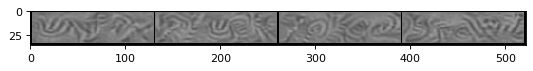

In [18]:
# dream without any contribution from discriminator
im = dreamerGAN.batch_dream([0,1,2,3])
im = dreamerGAN.show(im)

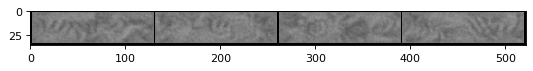

In [19]:
im = dreamerGAN.batch_dream_GAN()
im = dreamerGAN.show(im)

In [8]:
def create_dataset(num_labels):
    transform = dg.mjsynth.mjsynth_gray_scale
    ds = dg.mjsynth.MjSynthWS('/var/tmp/on63ilaw/mjsynth/',transform)
    labels_and_indices_dict =  csv_to_dict('../library/labels_and_indices.csv')
    labels_dict = csv_to_dict('../library/labels_1.csv')
    labels_inv_dict = csv_to_dict('../library/labels_2.csv')
    
    ds = extract_dataset(ds,labels_and_indices_dict,labels_dict,num_labels)
    
    return ds
ds = create_dataset(100)
#statically train a discriminator into identifying real and dream images
start = timer()
dreamerGAN.train_model(ds)
end = timer()

Dreaming a batch..


RuntimeError: CUDA out of memory. Tried to allocate 4.00 GiB (GPU 0; 7.92 GiB total capacity; 5.43 GiB already allocated; 1.75 GiB free; 14.50 MiB cached)

In [ ]:
# print(end - start)

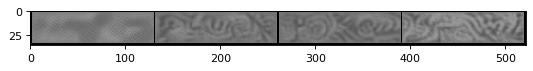

In [21]:
# dream adversarially with a trained discriminator
# discrim_net = DictNet(2)
# discrim_net.load_state_dict(torch.load("../models/discriminator_0.pth"))
# dreamerGAN = DeepDreamGAN(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True,discrim_net=discrim_net)
im = dreamerGAN.batch_dream_GAN()
im = dreamerGAN.show(im)

In [32]:
# dreamerGAN.reinit_discrim_net()
# start = timer()
# dreamerGAN.train_discriminator(ds,static_train=False)
# end = timer()
# print(end - start)

Discriminator re-initialized
Dreaming a batch..
Dream batch generated
0,887,0.8344612121582031,0.6015625
Dreaming a batch..
Dream batch generated
1,849,1.7688318490982056,0.7421875
Dreaming a batch..
Dream batch generated
2,783,0.22785457968711853,0.953125
Dreaming a batch..
Dream batch generated
3,117,5.801767110824585e-05,1.0


Device used to run this program:  cuda
Loading the network...
Network Loaded
Gaussian filter will be used
Discriminator network set


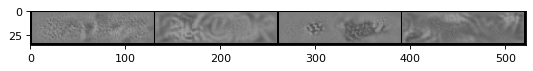

In [25]:
discrim_net = DictNet(2)
discrim_net.load_state_dict(torch.load("../models/discriminator_1.pth"))
dreamerGAN = DeepDreamGAN(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True,discrim_net=discrim_net)
im = dreamerGAN.batch_dream_GAN()
im = dreamerGAN.show(im)